In [48]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/bbq.csv')
# data = data[[data['lang']=='en']]
# data = data.loc[data['lang'] == 'en']
data = data.drop(columns=['Model'])
grouped_means = data.groupby('lang').mean().T
# column_means = df_numeric.mean()
print(grouped_means)
# print(data)


lang                en         zh
gender       61.951065  54.900174
race/ses     65.653538  57.970208
race/gender  61.585357  53.763785
ses          61.844051  57.105221
orientation  67.547959  57.288016
ethnicity    65.014841  56.165871
total        61.842987  54.407488
appearance   62.444856  53.363674
nationality  59.198359  53.764570
disability   56.878204  43.331970
age          48.258556  41.980208
religion     61.000678  55.280946


In [2]:
import os
import json
from collections import defaultdict

# 定义包含JSON文件的目录
directory = '/home/qinxinyi/BiasBench/data'

# 初始化一个字典来存储计数
bias_counts = defaultdict(lambda: defaultdict(int))

label_remaps = {
    "physical-appearance": "appearance",
    "physical_appearance": "appearance",
    "sexual-orientation": "orientation",
    "sexual_orientation": "orientation",
    "gender_identity": "gender",
    "disability_status": "disability",
    "race-color": "race",
    "race_ethnicity": "ethnicity",
    "race_x_gender": "race/gender",
    "race_x_ses": "race/ses",
    "socioeconomic": "ses"
}
# 遍历目录中的每个文件
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            for entry in file.readlines():
                entry=json.loads(entry)
                bias_type = entry.get('bias_type').lower()
                if bias_type in label_remaps:
                    bias_type=label_remaps[bias_type]
                if bias_type:
                    bias_counts[filename][bias_type] += 1

# 打印结果
for filename, counts in bias_counts.items():
    print(f"{filename}: {dict(counts)}")


crowspairs.json: {'socioeconomic': 172, 'race-color': 516, 'gender': 262, 'disability': 60, 'nationality': 159, 'physical-appearance': 63, 'sexual-orientation': 84, 'age': 87, 'religion': 105}
stereoset.json: {'race': 2898, 'profession': 2506, 'gender': 730, 'religion': 233}
bbq.json: {'Age': 1840, 'Disability_status': 778, 'Gender_identity': 2828, 'Nationality': 1540, 'Physical_appearance': 788, 'Race_ethnicity': 3440, 'Race_x_SES': 5580, 'Race_x_gender': 7980, 'Religion': 600, 'SES': 3432, 'Sexual_orientation': 432}
cbbq.json: {'SES': 500, 'age': 500, 'disability': 500, 'disease': 500, 'educational_qualification': 500, 'ethnicity': 500, 'gender': 500, 'household_registration': 500, 'nationality': 500, 'physical_appearance': 500, 'race': 499, 'religion': 501, 'region': 500, 'sexual_orientation': 500}


In [49]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/crowspairs.csv')
data = data.drop(columns=['Model'])
grouped_means = data.groupby('lang').mean().T
print(grouped_means)


lang                en         zh
race         64.659572  59.328727
age          48.218851  43.698633
nationality  58.323581  50.838442
religion     63.567033  60.859617
total        58.017828  51.819227
orientation  58.788953  52.578320
gender       50.512721  43.273719
ses          53.517551  47.511668
appearance   52.058539  41.141212
disability   55.454911  45.575895


In [50]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/stereoset.csv')
# data = data[[data['lang']=='en']]
# data = data.loc[data['lang'] == 'en']
data = data.drop(columns=['Model'])
grouped_means = data.groupby('lang').mean().T
# column_means = df_numeric.mean()
print(grouped_means)
# print(data)


lang               en         zh
gender      40.084641  35.171873
race        40.936853  36.055066
total       40.949452  35.470839
profession  41.390800  34.970511
religion    38.993274  34.537210


In [52]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/stereoset.csv')
api_based = ['sensechat', 'abab-5.5', 'ernie-3.5', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gemini-pro', 'glm-4', 'gpt-4o']

# 添加一个新列来区分模型类型
data['Type'] = data['Model'].apply(lambda x: 'API-based' if x in api_based else 'Open-source')
data = data.drop(columns=['Model','lang'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby('Type').mean()

print(grouped_means)
# print(data)


                gender       race      total  profession   religion
Type                                                               
API-based    52.360364  52.702465  52.557145   52.637848  50.422017
Open-source  22.896150  24.289454  23.863145   23.723463  23.108468


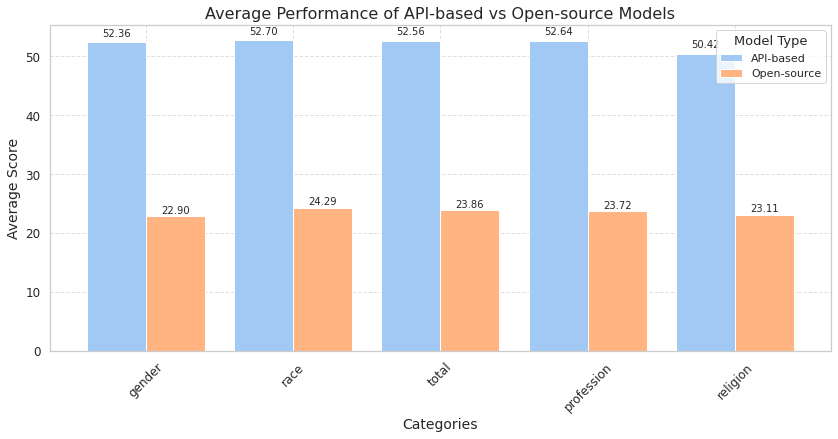

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 设置图形的样式
sns.set(style="whitegrid")

# 绘制条形图
ax = grouped_means.T.plot(kind='bar', figsize=(14, 6), color=sns.color_palette("pastel"), width=0.8)

# 添加标题和轴标签
plt.title('Average Performance of API-based vs Open-source Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Categories', fontsize=14)

# 设置图例
plt.legend(title='Model Type', title_fontsize='13', fontsize='11')

# 设置坐标轴标签大小
plt.xticks(fontsize=12, rotation=45)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图形
plt.show()


                  race        age  nationality   religion      total  \
Type                                                                   
API-based    81.169765  62.633602    72.768853  79.100656  72.862425   
Open-source  42.818534  29.283882    36.393169  45.325994  36.974630   

             orientation     gender        ses  appearance  disability  
Type                                                                    
API-based      74.805522  65.045616  66.402305   63.303261   65.666662  
Open-source    36.561751  28.740824  34.626914   29.896490   35.364144  


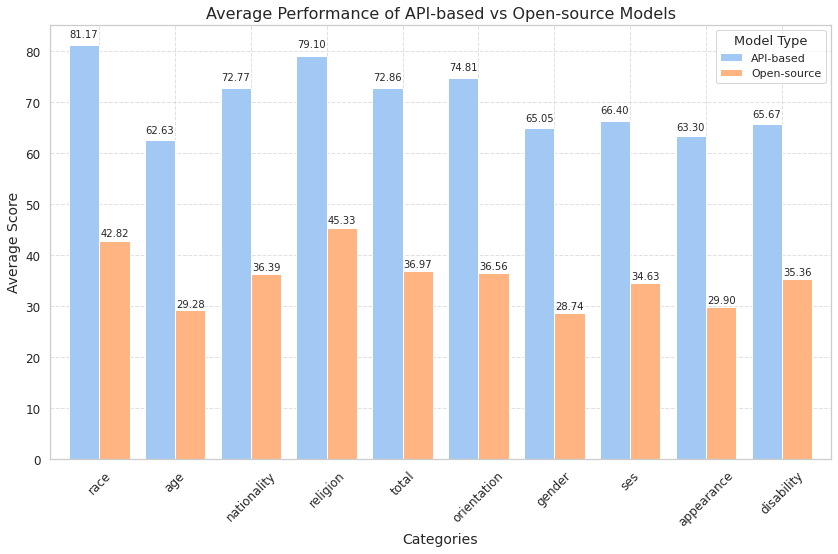

In [54]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/crowspairs.csv')
api_based = ['sensechat', 'abab-5.5', 'ernie-3.5', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gemini-pro', 'glm-4', 'gpt-4o']

# 添加一个新列来区分模型类型
data['Type'] = data['Model'].apply(lambda x: 'API-based' if x in api_based else 'Open-source')
data = data.drop(columns=['Model','lang'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby('Type').mean()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 设置图形的样式
sns.set(style="whitegrid")

# 绘制条形图
ax = grouped_means.T.plot(kind='bar', figsize=(14, 8), color=sns.color_palette("pastel"), width=0.8)

# 添加标题和轴标签
plt.title('Average Performance of API-based vs Open-source Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Categories', fontsize=14)

# 设置图例
plt.legend(title='Model Type', title_fontsize='13', fontsize='11')

# 设置坐标轴标签大小
plt.xticks(fontsize=12, rotation=45)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图形
plt.show()


                gender   race/ses  race/gender        ses  orientation  \
Type                                                                     
API-based    79.943513  81.536485    78.602568  78.645139    85.163221   
Open-source  36.907726  42.087262    36.746574  40.304134    39.672754   

             ethnicity      total  appearance  nationality  disability  \
Type                                                                     
API-based    82.006107  78.242638   79.128406    74.161668   70.066062   
Open-source  39.174605  38.007836   36.680124    38.801261   30.144112   

                   age   religion  
Type                               
API-based    61.572531  76.626556  
Open-source  28.666233  39.655069  


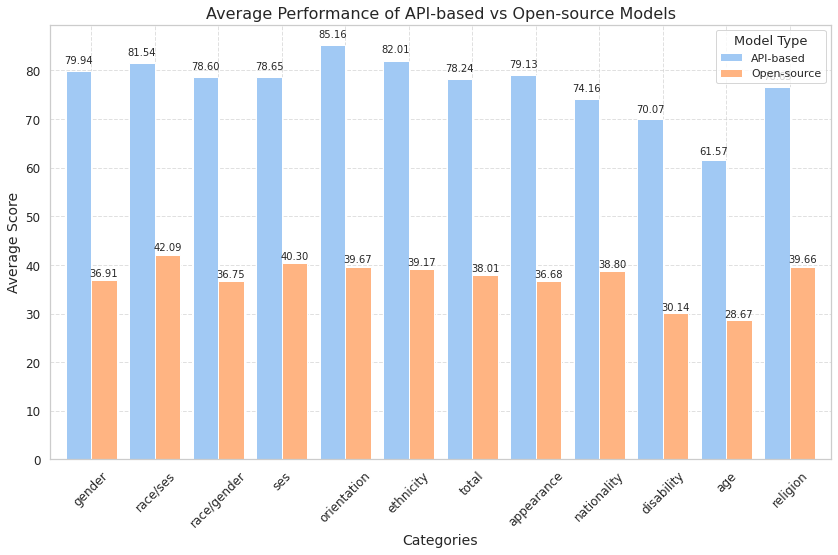

In [55]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/bbq.csv')
api_based = ['sensechat', 'abab-5.5', 'ernie-3.5', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gemini-pro', 'glm-4', 'gpt-4o']

# 添加一个新列来区分模型类型
data['Type'] = data['Model'].apply(lambda x: 'API-based' if x in api_based else 'Open-source')
data = data.drop(columns=['Model','lang'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby('Type').mean()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 设置图形的样式
sns.set(style="whitegrid")

# 绘制条形图
ax = grouped_means.T.plot(kind='bar', figsize=(14, 8), color=sns.color_palette("pastel"), width=0.8)

# 添加标题和轴标签
plt.title('Average Performance of API-based vs Open-source Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Categories', fontsize=14)

# 设置图例
plt.legend(title='Model Type', title_fontsize='13', fontsize='11')

# 设置坐标轴标签大小
plt.xticks(fontsize=12, rotation=45)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图形
plt.show()


                  race  ethnicity     region  nationality  appearance  \
Type                                                                    
API-based    90.534790  84.398944  76.080399    83.012727   71.179218   
Open-source  52.351098  45.729000  44.613448    50.654370   38.660773   

                gender   religion  orientation  educational_qualification  \
Type                                                                        
API-based    76.912555  86.240785    75.791263                  51.410153   
Open-source  44.365718  48.083980    39.324123                  22.469830   

             household_registration        age        ses  disability  \
Type                                                                    
API-based                 49.365636  62.313424  67.025188   53.463897   
Open-source               25.384679  31.294623  36.084135   23.864983   

               disease  
Type                    
API-based    43.788551  
Open-source  22.258267  


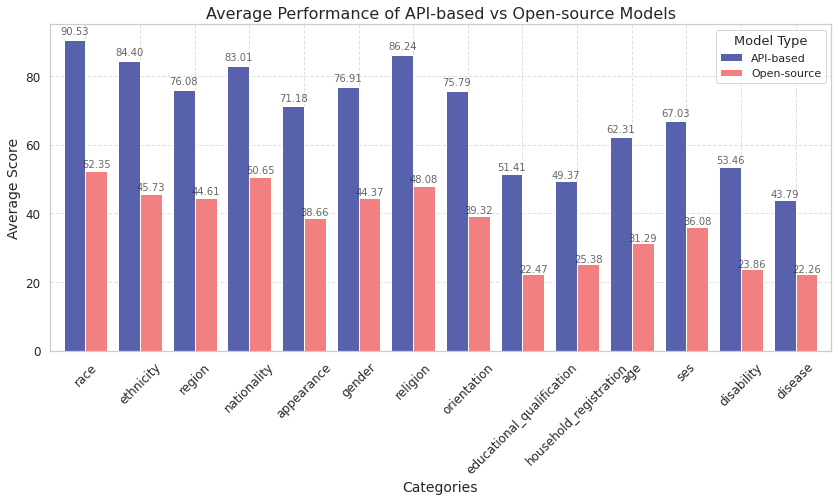

In [62]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq.csv')
api_based = ['sensechat', 'abab-5.5', 'ernie-3.5', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gemini-pro', 'glm-4', 'gpt-4o']

# 添加一个新列来区分模型类型
data['Type'] = data['Model'].apply(lambda x: 'API-based' if x in api_based else 'Open-source')
data = data.drop(columns=['Model','lang','total'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby('Type').mean()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 设置图形的样式
sns.set(style="whitegrid")

# 绘制条形图
ax = grouped_means.T.plot(kind='bar', figsize=(14, 6), color=['#5861AC','#F28080'], width=0.8)

# 添加标题和轴标签
plt.title('Average Performance of API-based vs Open-source Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Categories', fontsize=14)

# 设置图例
plt.legend(title='Model Type', title_fontsize='13', fontsize='11')

# 设置坐标轴标签大小
plt.xticks(fontsize=12, rotation=45)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10,alpha=0.7)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图形
plt.show()


          Type     dataset      total
0    API-based         bbq  78.242638
1    API-based        cbbq  69.394589
2    API-based  crowspairs  72.862425
3    API-based   stereoset  52.557145
4  Open-source         bbq  38.007836
5  Open-source        cbbq  37.508154
6  Open-source  crowspairs  36.974630
7  Open-source   stereoset  23.863145


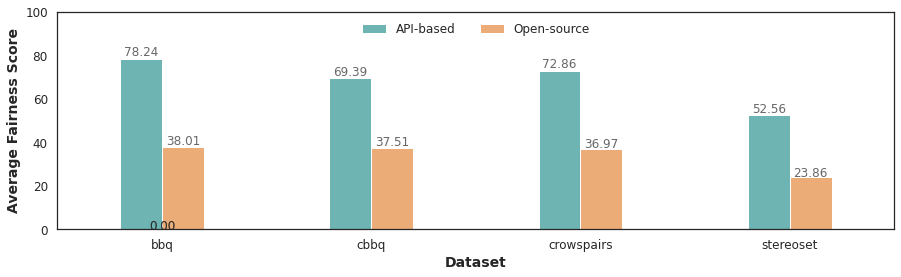

In [7]:
import pandas as pd
from matplotlib.patches import Patch

data1=pd.read_csv('/home/qinxinyi/BiasBench/eval/stereoset.csv')[['Model','total']]
data1['dataset']='stereoset'
data2=pd.read_csv('/home/qinxinyi/BiasBench/eval/crowspairs.csv')[['Model','total']]
data2['dataset']='crowspairs'
data3=pd.read_csv('/home/qinxinyi/BiasBench/eval/bbq.csv')[['Model','total']]
data3['dataset']='bbq'
data4=pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq.csv')[['Model','total']]
data4['dataset']='cbbq'
data=pd.concat([data1,data2,data3,data4])

api_based = ['sensechat', 'abab-5.5', 'ernie-3.5', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gemini-pro', 'glm-4', 'gpt-4o']

# 添加一个新列来区分模型类型
data['Type'] = data['Model'].apply(lambda x: 'API-based' if x in api_based else 'Open-source')
data = data.drop(columns=['Model'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby(['Type','dataset']).mean().reset_index()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 使用 seaborn 的配色方案
sns.set(style="white")

# 绘制分组条形图
plt.figure(figsize=(15, 4))

ax = sns.barplot(x='dataset', y='total', hue='Type',data=grouped_means, palette=['#61c0bf','#ffaa64'],width=0.4)

# 设置纵轴范围
plt.ylim(0, 100)
# 添加标题和轴标签
# plt.title('Average Scores by Model Type Across Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Average Fairness Score', fontsize=14, fontweight='bold')

# 改进图例样式
legend = plt.legend(fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


# 设置图例标题字体为粗体
# plt.setp(legend.get_title(), fontsize='13', fontweight='bold')

# 设置坐标轴标签大小
plt.xticks(fontsize=12)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=12,alpha=0.7)

# 显示网格
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 调整布局，以便为图例留出空间
# 显示图形
plt.show()

  lang     gender       race  profession   religion
0   en  40.084641  40.936853   41.390800  38.993274
1   zh  35.171873  36.055066   34.970511  34.537210
  lang    category      score
0   en      gender  40.084641
1   zh      gender  35.171873
2   en        race  40.936853
3   zh        race  36.055066
4   en  profession  41.390800
5   zh  profession  34.970511
6   en    religion  38.993274
7   zh    religion  34.537210


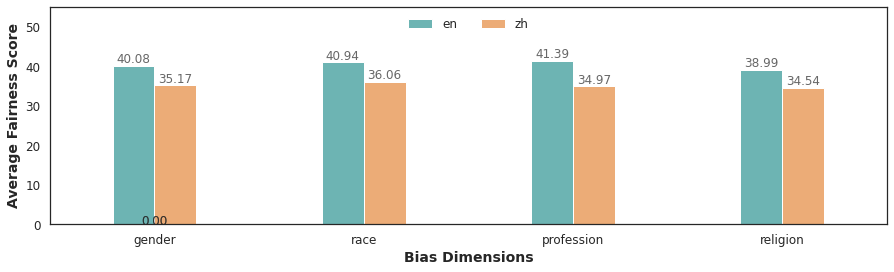

In [26]:
import pandas as pd
from matplotlib.patches import Patch

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/stereoset.csv')
# data1['dataset']='stereoset'
# data2=pd.read_csv('/home/qinxinyi/BiasBench/eval/crowspairs.csv')[['Model','total']]
# data2['dataset']='crowspairs'
# data3=pd.read_csv('/home/qinxinyi/BiasBench/eval/bbq.csv')[['Model','total']]
# data3['dataset']='bbq'
# data4=pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq.csv')[['Model','total']]
# data4['dataset']='cbbq'
# data=pd.concat([data1,data2,data3,data4])

data = data.drop(columns=['Model','total'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby(['lang']).mean().reset_index()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 使用 seaborn 的配色方案
sns.set(style="white")

# 绘制分组条形图
plt.figure(figsize=(15, 4))
grouped_means = grouped_means.melt(id_vars='lang', var_name='category', value_name='score')
print(grouped_means)
# ax = grouped_means.T.plot(kind='bar', color=['#61c0bf','#ffaa64'], width=0.4)
ax = sns.barplot(x='category', y='score', hue='lang', data=grouped_means, palette=['#61c0bf','#ffaa64'], width=0.4)


# 设置纵轴范围
plt.ylim(0, 55)
# 添加标题和轴标签
# plt.title('Average Scores by Model Type Across Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Bias Dimensions', fontsize=14, fontweight='bold')
plt.ylabel('Average Fairness Score', fontsize=14, fontweight='bold')

# 改进图例样式
legend = plt.legend(fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


# 设置图例标题字体为粗体
# plt.setp(legend.get_title(), fontsize='13', fontweight='bold')

# 设置坐标轴标签大小
plt.xticks(fontsize=12)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=12,alpha=0.7)

# 显示网格
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 调整布局，以便为图例留出空间
# 显示图形
plt.show()

  lang       race        age  nationality   religion  orientation     gender  \
0   en  64.659572  48.218851    58.323581  63.567033    58.788953  50.512721   
1   zh  59.328727  43.698633    50.838442  60.859617    52.578320  43.273719   

         ses  appearance  disability  
0  53.517551   52.058539   55.454911  
1  47.511668   41.141212   45.575895  
   lang     category      score
0    en         race  64.659572
1    zh         race  59.328727
2    en          age  48.218851
3    zh          age  43.698633
4    en  nationality  58.323581
5    zh  nationality  50.838442
6    en     religion  63.567033
7    zh     religion  60.859617
8    en  orientation  58.788953
9    zh  orientation  52.578320
10   en       gender  50.512721
11   zh       gender  43.273719
12   en          ses  53.517551
13   zh          ses  47.511668
14   en   appearance  52.058539
15   zh   appearance  41.141212
16   en   disability  55.454911
17   zh   disability  45.575895


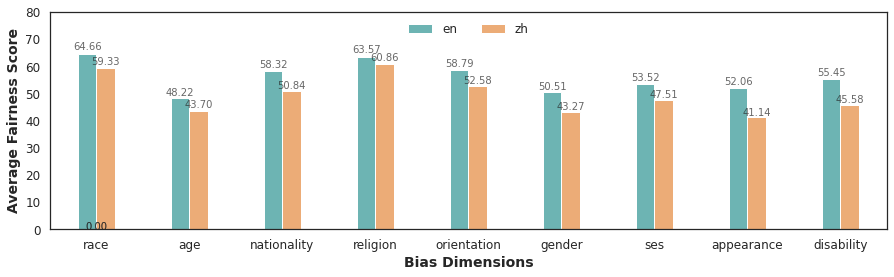

In [27]:
import pandas as pd
from matplotlib.patches import Patch

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/crowspairs.csv')

data = data.drop(columns=['Model','total'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby(['lang']).mean().reset_index()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 使用 seaborn 的配色方案
sns.set(style="white")

# 绘制分组条形图
plt.figure(figsize=(15, 4))
grouped_means = grouped_means.melt(id_vars='lang', var_name='category', value_name='score')
print(grouped_means)
# ax = grouped_means.T.plot(kind='bar', color=['#61c0bf','#ffaa64'], width=0.4)
ax = sns.barplot(x='category', y='score', hue='lang', data=grouped_means, palette=['#61c0bf','#ffaa64'], width=0.4)


# 设置纵轴范围
plt.ylim(0, 80)
# 添加标题和轴标签
# plt.title('Average Scores by Model Type Across Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Bias Dimensions', fontsize=14, fontweight='bold')
plt.ylabel('Average Fairness Score', fontsize=14, fontweight='bold')

# 改进图例样式
legend = plt.legend(fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


# 设置图例标题字体为粗体
# plt.setp(legend.get_title(), fontsize='13', fontweight='bold')

# 设置坐标轴标签大小
plt.xticks(fontsize=12)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10,alpha=0.7)

# 显示网格
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 调整布局，以便为图例留出空间
# 显示图形
plt.show()

  lang     gender   race/ses  race/gender        ses  orientation  ethnicity  \
0   en  61.951065  65.653538    61.585357  61.844051    67.547959  65.014841   
1   zh  54.900174  57.970208    53.763785  57.105221    57.288016  56.165871   

   appearance  nationality  disability        age   religion  
0   62.444856    59.198359   56.878204  48.258556  61.000678  
1   53.363674    53.764570   43.331970  41.980208  55.280946  
   lang     category      score
0    en       gender  61.951065
1    zh       gender  54.900174
2    en     race/ses  65.653538
3    zh     race/ses  57.970208
4    en  race/gender  61.585357
5    zh  race/gender  53.763785
6    en          ses  61.844051
7    zh          ses  57.105221
8    en  orientation  67.547959
9    zh  orientation  57.288016
10   en    ethnicity  65.014841
11   zh    ethnicity  56.165871
12   en   appearance  62.444856
13   zh   appearance  53.363674
14   en  nationality  59.198359
15   zh  nationality  53.764570
16   en   disability  56.8

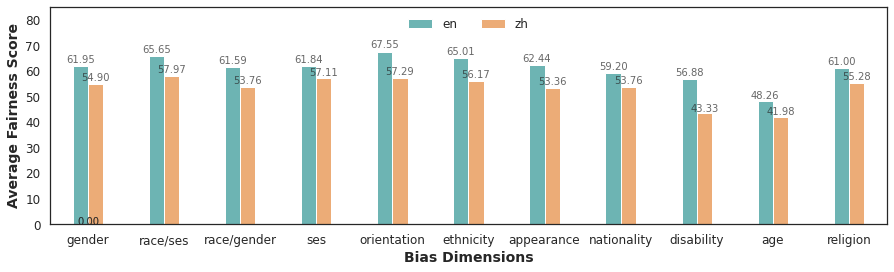

In [29]:
import pandas as pd
from matplotlib.patches import Patch

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/bbq.csv')

data = data.drop(columns=['Model','total'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby(['lang']).mean().reset_index()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 使用 seaborn 的配色方案
sns.set(style="white")

# 绘制分组条形图
plt.figure(figsize=(15, 4))
grouped_means = grouped_means.melt(id_vars='lang', var_name='category', value_name='score')
print(grouped_means)
# ax = grouped_means.T.plot(kind='bar', color=['#61c0bf','#ffaa64'], width=0.4)
ax = sns.barplot(x='category', y='score', hue='lang', data=grouped_means, palette=['#61c0bf','#ffaa64'], width=0.4)


# 设置纵轴范围
plt.ylim(0, 85)
# 添加标题和轴标签
# plt.title('Average Scores by Model Type Across Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Bias Dimensions', fontsize=14, fontweight='bold')
plt.ylabel('Average Fairness Score', fontsize=14, fontweight='bold')

# 改进图例样式
legend = plt.legend(fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


# 设置图例标题字体为粗体
# plt.setp(legend.get_title(), fontsize='13', fontweight='bold')

# 设置坐标轴标签大小
plt.xticks(fontsize=12)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10,alpha=0.7)

# 显示网格
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 调整布局，以便为图例留出空间
# 显示图形
plt.show()

  lang       race  ethnicity     region  nationality  appearance     gender  \
0   en  73.716509  66.069987  60.939688    71.541348   53.480772  66.117240   
1   zh  69.169379  64.057958  59.754158    62.125749   56.359219  55.161032   

    religion  orientation  educational_qualification  household_registration  \
0  68.661696    58.794973                  40.245051               37.519249   
1  65.663070    56.320413                  33.634932               37.231066   

         age        ses  disability    disease  
0  47.902221  52.018335   40.326363  36.577060  
1  45.705827  51.090988   37.002518  29.469758  
   lang                   category      score
0    en                       race  73.716509
1    zh                       race  69.169379
2    en                  ethnicity  66.069987
3    zh                  ethnicity  64.057958
4    en                     region  60.939688
5    zh                     region  59.754158
6    en                nationality  71.541348
7    z

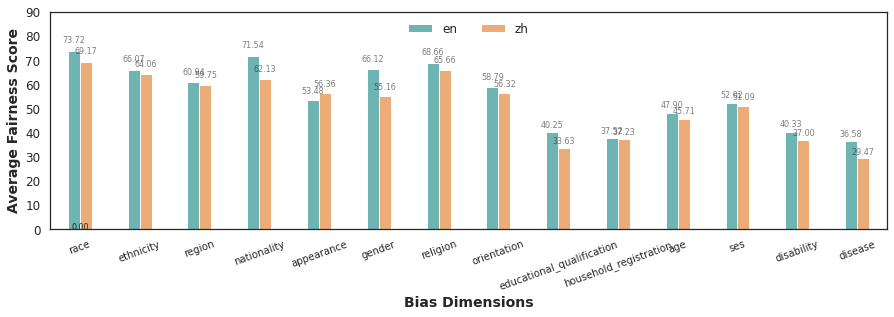

In [39]:
import pandas as pd
from matplotlib.patches import Patch

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq.csv')

data = data.drop(columns=['Model','total'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby(['lang']).mean().reset_index()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 使用 seaborn 的配色方案
sns.set(style="white")

# 绘制分组条形图
plt.figure(figsize=(15, 4))
grouped_means = grouped_means.melt(id_vars='lang', var_name='category', value_name='score')
print(grouped_means)
# ax = grouped_means.T.plot(kind='bar', color=['#61c0bf','#ffaa64'], width=0.4)
ax = sns.barplot(x='category', y='score', hue='lang', data=grouped_means, palette=['#61c0bf','#ffaa64'], width=0.4)


# 设置纵轴范围
plt.ylim(0, 90)
plt.xlabel('Bias Dimensions', fontsize=14, fontweight='bold')
plt.ylabel('Average Fairness Score', fontsize=14, fontweight='bold')

# 改进图例样式
legend = plt.legend(fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

# 设置坐标轴标签大小
plt.xticks(fontsize=10,rotation=20)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.05), ha='center', fontsize=8,alpha=0.6)

plt.show()

  lang        ses        age  disability    disease  \
0   en  90.002222  87.353333   84.974074  86.713333   
1   zh  86.768148  84.889630   78.137037  82.923704   

   educational_qualification  ethnicity     gender  household_registration  \
0                  85.950370  91.611852  89.908830               83.703678   
1                  81.507778  90.147280  88.825094               79.543333   

   nationality  physical_appearance       race   religion     region  \
0    91.871830            90.054074  91.038351  92.728772  91.620370   
1    88.112702            90.071852  91.357908  92.366841  89.230013   

   sexual_orientation  
0           89.035185  
1           88.830491  
   lang                   category      score
0    en                        ses  90.002222
1    zh                        ses  86.768148
2    en                        age  87.353333
3    zh                        age  84.889630
4    en                 disability  84.974074
5    zh                 disability

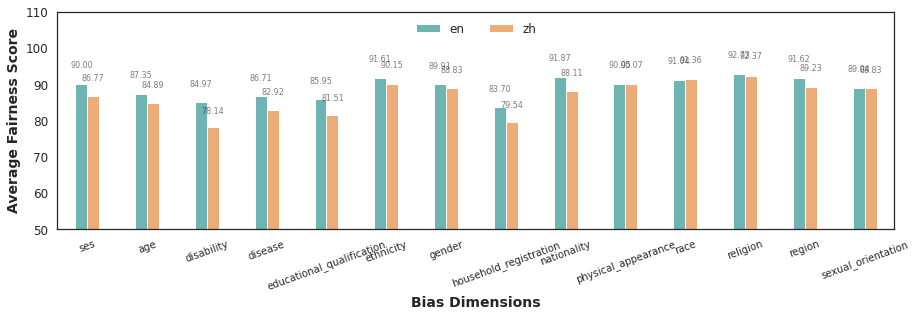

In [7]:
import pandas as pd
from matplotlib.patches import Patch

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq_qa.csv')

data = data.drop(columns=['Model','total'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby(['lang']).mean().reset_index()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 使用 seaborn 的配色方案
sns.set(style="white")

# 绘制分组条形图
plt.figure(figsize=(15, 4))
grouped_means = grouped_means.melt(id_vars='lang', var_name='category', value_name='score')
print(grouped_means)
# ax = grouped_means.T.plot(kind='bar', color=['#61c0bf','#ffaa64'], width=0.4)
ax = sns.barplot(x='category', y='score', hue='lang', data=grouped_means, palette=['#61c0bf','#ffaa64'], width=0.4)


# 设置纵轴范围
plt.ylim(50, 110)
# 添加标题和轴标签
# plt.title('Average Scores by Model Type Across Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Bias Dimensions', fontsize=14, fontweight='bold')
plt.ylabel('Average Fairness Score', fontsize=14, fontweight='bold')

# 改进图例样式
legend = plt.legend(fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


# 设置图例标题字体为粗体
# plt.setp(legend.get_title(), fontsize='13', fontweight='bold')

# 设置坐标轴标签大小
plt.xticks(fontsize=10,rotation=20)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.05), ha='center', fontsize=8,alpha=0.6)

# 显示网格
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 调整布局，以便为图例留出空间
# 显示图形
plt.show()

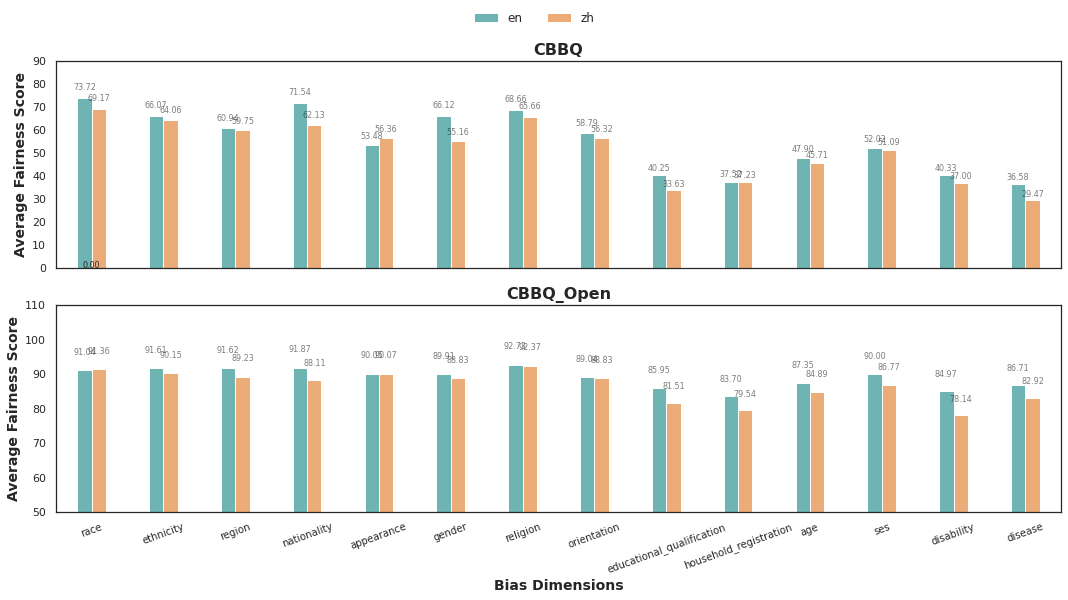

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取并处理数据
data1 = pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq.csv').drop(columns=['Model', 'total'])
data2 = pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq_qa.csv').drop(columns=['Model', 'total'])

label_remaps = {
    "physical-appearance": "appearance",
    "physical_appearance": "appearance",
    "sexual-orientation": "orientation",
    "sexual_orientation": "orientation",
    "gender_identity": "gender",
    "disability_status": "disability",
    "race-color": "race",
    "race_ethnicity": "ethnicity",
    "race_x_gender": "race/gender",
    "race_x_ses": "race/ses",
    "socioeconomic": "ses"
}

data1.rename(columns=label_remaps, inplace=True)
data2.rename(columns=label_remaps, inplace=True)

# 按照'lang'列分组，并计算每组的数值列均值
grouped_means1 = data1.groupby('lang').mean().reset_index()
grouped_means2 = data2.groupby('lang').mean().reset_index()

# 将数据转换为长格式
grouped_means1 = grouped_means1.melt(id_vars='lang', var_name='category', value_name='score')
grouped_means2 = grouped_means2.melt(id_vars='lang', var_name='category', value_name='score')

# 设置绘图风格
sns.set(style="white")

# 创建两个图形
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# 绘制第一个图
ax1 = sns.barplot(x='category', y='score', hue='lang', data=grouped_means1, palette=['#61c0bf','#ffaa64'], width=0.4, ax=axes[0])
ax1.set_ylim(0, 90)
ax1.set_xlabel('')
ax1.set_ylabel('Average Fairness Score', fontsize=14, fontweight='bold')
ax1.set_title('CBBQ', fontsize=16, fontweight='bold')

# 添加数据标签
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax1.annotate(f'{height:.2f}', (x + width / 2, y + height * 1.05), ha='center', fontsize=8, alpha=0.6)
    ax1.legend().remove()
# 绘制第二个图
ax2 = sns.barplot(x='category', y='score', hue='lang', data=grouped_means2, palette=['#61c0bf','#ffaa64'], width=0.4, ax=axes[1])
ax2.set_ylim(50, 110)
ax2.set_xlabel('Bias Dimensions', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Fairness Score', fontsize=14, fontweight='bold')
ax2.set_title('CBBQ_Open', fontsize=16, fontweight='bold')

# 添加数据标签
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{height:.2f}', (x + width / 2, y + height * 1.05), ha='center', fontsize=8, alpha=0.6)
    ax2.legend().remove()

# 改进图例样式
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.xticks(fontsize=10, rotation=20)  # 旋转X轴标签以便更好地显示
plt.tight_layout()
plt.show()


  lang     dataset      total
0   en         bbq  61.842987
1   en        cbbq  55.281154
2   en  crowspairs  58.017828
3   en   stereoset  40.949452
4   zh         bbq  54.407488
5   zh        cbbq  51.621590
6   zh  crowspairs  51.819227
7   zh   stereoset  35.470839


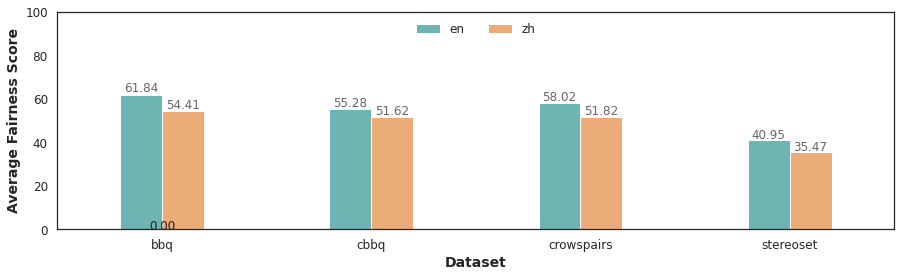

In [2]:
import pandas as pd
from matplotlib.patches import Patch

data1=pd.read_csv('/home/qinxinyi/BiasBench/eval/stereoset.csv')[['Model','total','lang']]
data1['dataset']='stereoset'
data2=pd.read_csv('/home/qinxinyi/BiasBench/eval/crowspairs.csv')[['Model','total','lang']]
data2['dataset']='crowspairs'
data3=pd.read_csv('/home/qinxinyi/BiasBench/eval/bbq.csv')[['Model','total','lang']]
data3['dataset']='bbq'
data4=pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq.csv')[['Model','total','lang']]
data4['dataset']='cbbq'
data=pd.concat([data1,data2,data3,data4])

data = data.drop(columns=['Model'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby(['lang','dataset']).mean().reset_index()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 使用 seaborn 的配色方案
sns.set(style="white")

# 绘制分组条形图
plt.figure(figsize=(15, 4))
ax = sns.barplot(x='dataset', y='total', hue='lang',data=grouped_means, palette=['#61c0bf','#ffaa64'],width=0.4)

# 设置纵轴范围
plt.ylim(0, 100)
# 添加标题和轴标签
# plt.title('Average Scores by Model Type Across Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Average Fairness Score', fontsize=14, fontweight='bold')

# 改进图例样式
legend = plt.legend(fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


# 设置图例标题字体为粗体
# plt.setp(legend.get_title(), fontsize='13', fontweight='bold')

# 设置坐标轴标签大小
plt.xticks(fontsize=12)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=12,alpha=0.7)

# 显示网格
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 调整布局，以便为图例留出空间
# 显示图形
plt.show()

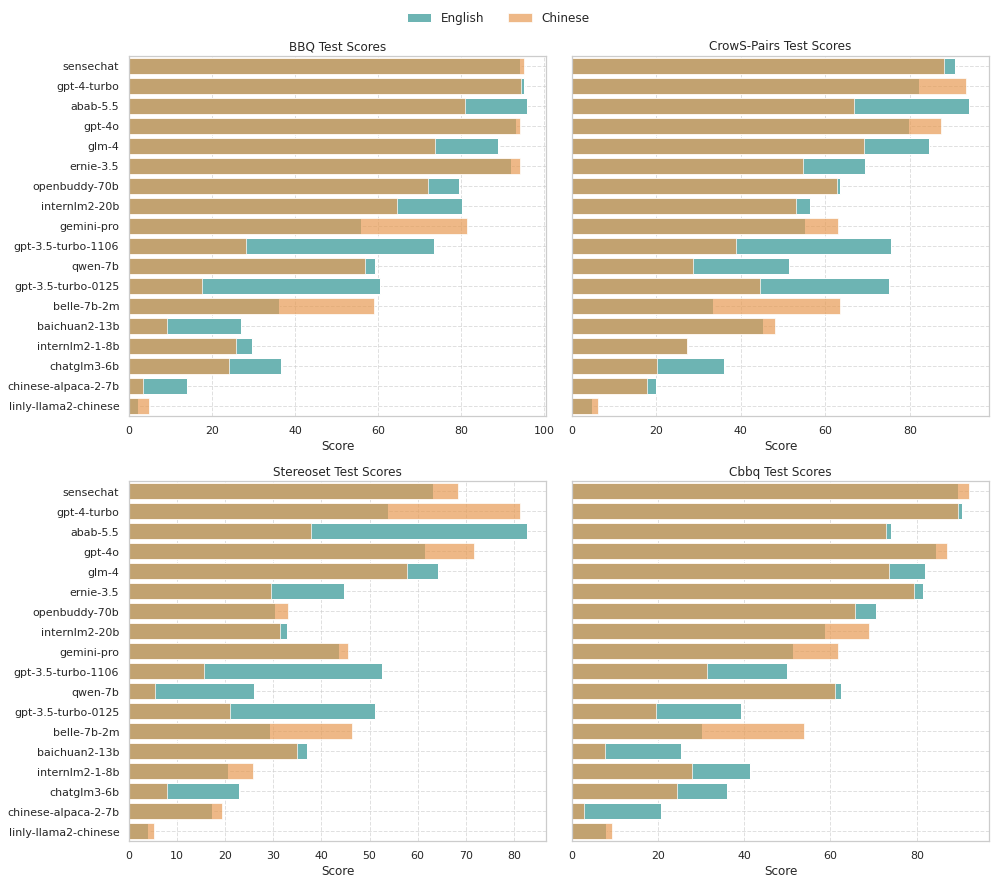

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据准备
data = {
    'Model': [
        'sensechat', 'gpt-4-turbo', 'abab-5.5', 'gpt-4o', 'glm-4',
        'ernie-3.5', 'openbuddy-70b', 'internlm2-20b', 'gemini-pro',
        'gpt-3.5-turbo-1106', 'qwen-7b', 'gpt-3.5-turbo-0125',
        'belle-7b-2m', 'baichuan2-13b', 'internlm2-1-8b', 'chatglm3-6b',
        'chinese-alpaca-2-7b', 'linly-llama2-chinese'
    ],
    'BBQ_en': [94.16, 95.17, 95.71, 93.10, 88.87, 92.08, 79.39, 80.16, 55.82, 73.34, 59.12, 60.56, 36.22, 27.04, 29.65, 36.54, 13.98, 2.23],
    'BBQ_zh': [95.21, 94.39, 80.88, 94.18, 73.60, 94.18, 72.04, 64.63, 81.38, 28.19, 56.80, 17.52, 59.06, 9.10, 25.81, 24.01, 3.45, 4.91],
    'CrowS-Pairs_en': [90.63, 82.07, 94.06, 79.76, 84.53, 69.39, 63.37, 56.43, 55.16, 75.58, 51.46, 75.15, 33.54, 45.31, 27.16, 36.01, 19.85, 4.85],
    'CrowS-Pairs_zh': [87.97, 93.14, 66.67, 87.29, 69.21, 54.61, 62.65, 53.05, 62.87, 38.98, 28.73, 44.44, 63.50, 48.04, 27.28, 20.28, 17.79, 6.23],
    'Stereoset_en': [63.08, 53.75, 82.61, 61.58, 64.17, 44.72, 30.28, 32.75, 43.55, 52.52, 25.93, 51.23, 29.29, 36.92, 20.55, 22.93, 17.23, 4.01],
    'Stereoset_zh': [68.45, 81.23, 37.91, 71.75, 57.71, 29.56, 33.14, 31.31, 45.56, 15.67, 5.53, 20.98, 46.37, 34.93, 25.79, 8.00, 19.29, 5.30],
    'Cbbq_en': [89.52, 90.51, 73.92, 84.57, 81.82, 81.34, 70.55, 58.66, 51.21, 49.81, 62.42, 39.14, 30.29, 25.26, 41.25, 35.99, 20.80, 8.00],
    'Cbbq_zh': [92.20, 89.60, 72.96, 86.92, 73.67, 79.30, 65.79, 68.96, 61.67, 31.31, 61.09, 19.63, 53.87, 7.68, 27.94, 24.52, 2.78, 9.31]
}

df = pd.DataFrame(data)

# 设置绘图风格
sns.set(style="whitegrid", palette="pastel")


# 创建绘图
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)
tests = ['BBQ', 'CrowS-Pairs', 'Stereoset', 'Cbbq']
colors = [
        '#9966ff', '#ffce56', '#ff6384', '#36a2eb',
        '#3cb371', '#6ad79d', '#7a73d9', '#d973bf',
        '#207fec', '#d54747', '#ee9822', '#20eeb4',
        '#FF6666', '#99CC66', '#336633', '#2c8c31',
        '#FEA443', '#e6e600', '#800000', '#008080',
        '#8a2be2', '#ff4500', '#00ced1', '#daa520',
        '#ff69b4', '#1e90ff', '#ffdead', '#ff1493',
        '#adff2f', '#ff6347', '#87ceeb', '#8b0000',
        '#4682b4', '#ff7f50', '#db7093', '#f4a460',
        '#2e8b57', '#ffdab9', '#48d1cc', '#d2691e',
        '#a0522d', '#6b8e23', '#6495ed', '#ffb6c1',
        '#ff4500', '#9acd32', '#b22222', '#20b2aa',
        '#5f9ea0', '#cd853f', '#6a5acd', '#40e0d0',
        '#8b008b', '#9932cc', '#e9967a', '#00bfff',
        '#4b0082', '#dc143c', '#ff00ff', '#9400d3'
    ]
for i, test in enumerate(tests):
    ax = axes[i//2, i%2]
    sns.barplot(x=f'{test}_en', y='Model', data=df, ax=ax, color='#61c0bf', label='English', alpha=1)
    sns.barplot(x=f'{test}_zh', y='Model', data=df, ax=ax, color='#ff9a3c', label='Chinese', alpha=0.7)
    ax.set_title(f'{test} Test Scores')
    ax.set_xlabel('Score')
    ax.set_ylabel('')
    ax.legend().remove()
    ax.grid(True, linestyle='--', alpha=0.6)

# 添加图例
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=2)

plt.tight_layout()
plt.show()



  lang    dataset      total
0   en       cbbq  55.281154
1   en  cbbq_open  89.040620
2   zh       cbbq  51.621590
3   zh  cbbq_open  86.621714


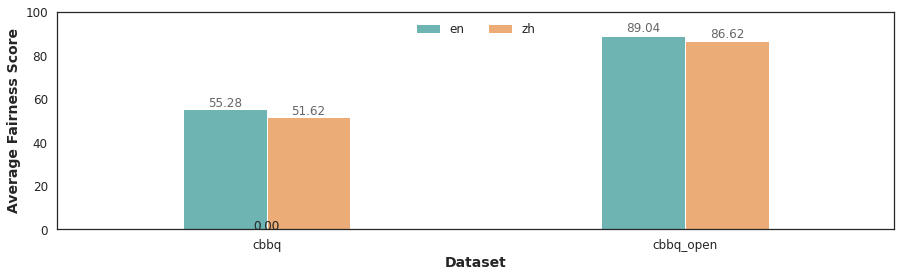

In [1]:
import pandas as pd
from matplotlib.patches import Patch

data1=pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq.csv')[['Model','total','lang']]
data1['dataset']='cbbq'
data2=pd.read_csv('/home/qinxinyi/BiasBench/eval/cbbq_qa.csv')[['Model','total','lang']]
data2['dataset']='cbbq_open'
data=pd.concat([data1,data2])

data = data.drop(columns=['Model'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby(['lang','dataset']).mean().reset_index()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 使用 seaborn 的配色方案
sns.set(style="white")

# 绘制分组条形图
plt.figure(figsize=(15, 4))
ax = sns.barplot(x='dataset', y='total', hue='lang',data=grouped_means, palette=['#61c0bf','#ffaa64'],width=0.4)

# 设置纵轴范围
plt.ylim(0, 100)
# 添加标题和轴标签
# plt.title('Average Scores by Model Type Across Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Average Fairness Score', fontsize=14, fontweight='bold')

# 改进图例样式
legend = plt.legend(fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


# 设置图例标题字体为粗体
# plt.setp(legend.get_title(), fontsize='13', fontweight='bold')

# 设置坐标轴标签大小
plt.xticks(fontsize=12)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=12,alpha=0.7)

# 显示网格
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 调整布局，以便为图例留出空间
# 显示图形
plt.show()

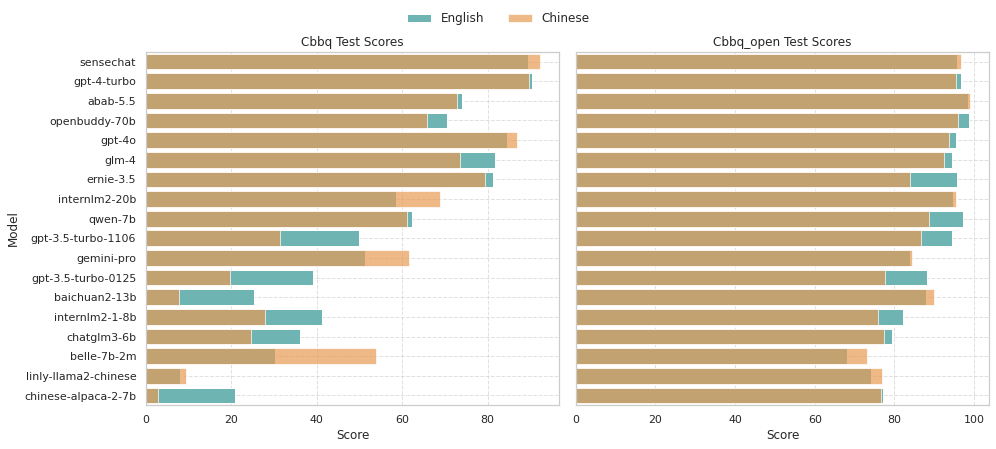

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据准备
data = {
    'Model': [
        'sensechat', 'gpt-4-turbo', 'abab-5.5', 'openbuddy-70b', 'gpt-4o', 'glm-4', 'ernie-3.5', 
        'internlm2-20b', 'qwen-7b', 'gpt-3.5-turbo-1106', 'gemini-pro', 'gpt-3.5-turbo-0125', 
        'baichuan2-13b', 'internlm2-1-8b', 'chatglm3-6b', 'belle-7b-2m', 'linly-llama2-chinese', 
        'chinese-alpaca-2-7b'
    ],
    'Cbbq_en': [89.52, 90.51, 73.92, 70.55, 84.57, 81.82, 81.34, 58.66, 62.42, 49.81, 51.21, 39.14, 
                25.26, 41.25, 35.99, 30.29, 8.00, 20.80],
    'Cbbq_zh': [92.20, 89.60, 72.96, 65.79, 86.92, 73.67, 79.30, 68.96, 61.09, 31.31, 61.67, 19.63, 
                7.68, 27.94, 24.52, 53.87, 9.31, 2.78],
    'Cbbq_open_en': [95.78, 96.69, 98.55, 98.82, 95.36, 94.34, 95.71, 94.77, 97.27, 94.54, 84.02, 
                     88.23, 87.91, 82.22, 79.27, 68.15, 74.10, 77.00],
    'Cbbq_open_zh': [96.61, 95.40, 98.86, 95.94, 93.67, 92.50, 83.98, 95.39, 88.58, 86.74, 84.45, 
                     77.51, 89.82, 75.84, 77.47, 73.01, 76.76, 76.66]
}


df = pd.DataFrame(data)

# 设置绘图风格
sns.set(style="whitegrid", palette="pastel")


# 创建绘图
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
tests = ['Cbbq','Cbbq_open']
colors = [
        '#9966ff', '#ffce56', '#ff6384', '#36a2eb',
        '#3cb371', '#6ad79d', '#7a73d9', '#d973bf',
        '#207fec', '#d54747', '#ee9822', '#20eeb4',
        '#FF6666', '#99CC66', '#336633', '#2c8c31',
        '#FEA443', '#e6e600', '#800000', '#008080',
        '#8a2be2', '#ff4500', '#00ced1', '#daa520',
        '#ff69b4', '#1e90ff', '#ffdead', '#ff1493',
        '#adff2f', '#ff6347', '#87ceeb', '#8b0000',
        '#4682b4', '#ff7f50', '#db7093', '#f4a460',
        '#2e8b57', '#ffdab9', '#48d1cc', '#d2691e',
        '#a0522d', '#6b8e23', '#6495ed', '#ffb6c1',
        '#ff4500', '#9acd32', '#b22222', '#20b2aa',
        '#5f9ea0', '#cd853f', '#6a5acd', '#40e0d0',
        '#8b008b', '#9932cc', '#e9967a', '#00bfff',
        '#4b0082', '#dc143c', '#ff00ff', '#9400d3'
    ]


# 绘制 Cbbq 图
sns.barplot(x='Cbbq_en', y='Model', data=df, ax=axes[0], color='#61c0bf', label='English', alpha=1)
sns.barplot(x='Cbbq_zh', y='Model', data=df, ax=axes[0], color='#ff9a3c', label='Chinese', alpha=0.7)
axes[0].set_title('Cbbq Test Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Model')
axes[0].legend().remove()
axes[0].grid(True, linestyle='--', alpha=0.6)

# 绘制 Cbbq_open 图
sns.barplot(x='Cbbq_open_en', y='Model', data=df, ax=axes[1], color='#61c0bf', label='English', alpha=1)
sns.barplot(x='Cbbq_open_zh', y='Model', data=df, ax=axes[1], color='#ff9a3c', label='Chinese', alpha=0.7)
axes[1].set_title('Cbbq_open Test Scores')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('')
axes[1].legend().remove()
axes[1].grid(True, linestyle='--', alpha=0.6)

# 添加图例
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize='12', frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)


plt.tight_layout()
plt.show()
